### DATA SCIENCE WITH PYTHON
### TASK: EXPLORATORY DATA ANALYSIS

![NBA](.\input\NBA.png)

### TASK 1: Data identification
Choose at least one open web API as your data source (i.e. not a static or
pre-collected dataset).

**API Chosen:**
A single API that was chosen for this assignment was that provided by https://rapidapi.com

Specifically, the NBA Game API: https://rapidapi.com/theapiguy/api/free-nba

The NBA data is fetched using two following endpoints:
    1. https://free-nba.p.rapidapi.com/games?page={}
    2. https://free-nba.p.rapidapi.com/stats?page={}

<ul>
    <li> <strong>The NBA Games data consists of detailed information of NBA games played. Every game can be identified by various number of parameters such as Which two teams (home team and visitor team) are involved in a game, on which date and home country where the game was played, number of quarters played, scores of both the teams and so on.
        </strong></li> <br>
    <li> <strong>The NBA Statistics is the detailed information about all the players belonging to NBA irreespective of the team they play for. Every player has a number of characteristics like: player name, height, weight, city he belongs to, number of steals, rebound he has done till today,how many blocks, how many game points he has earned, games he has played so far and so on. </strong>
    </li>
 </ul>

NBA games played throughout 2 decades ranging from 1990 till 2019 is collected using the given APIs.




In [1]:
# importing the necessary libraries

#For storing the API data in an apt data structure
import pandas as pd

#To load the jsn data fetched from API.
import json

#To flatten the API json data.
from pandas.io.json import json_normalize

#For numerical operations over the dataframe columns.
import numpy as np

#Visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Create a csv file.
import csv

#To fetch the API data.
import requests

# To create dictionary from the list
from collections import Counter

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import operator
from datetime import datetime

%matplotlib inline

### TASK 2: Data collection

Collect data from your API(s) using Python. Depending on the API(s), you may need to repeat the collection process multiple times to download sufficient data.

Store the collected data in an appropriate file format for subsequent analysis (e.g. JSON, XML, CSV).

**Limitation:** Only 25 records or only a single page data of the NBA Games data as well as the statistics of all the players can be fetched, So, a iteration through number of pages  from 1 till 100 is performed and the data of all 100 days is stored in a csv file format. 

To fetch the data from the API, authentication was needed. Authentication consists of two things:
1. API key
2. Host name

Further to perform any analysis on the collected data, the data is being read from the csv file in a storage data structure pandas "DataFrame" which makes it easier to pre-process and analyse the data.

In [2]:
# The authentication details are provided in the header. It consists of API Key and the Host name.

headers = {
    'X-RapidAPI-Key':'1840b93605msh33df96403a1e72cp1648b6jsn3f2c7b21d962',
    'X-RapidAPI-Host':'free-nba.p.rapidapi.com'}

#### DATA RETRIEVAL, PARSING AND STORAGE

In order to dynamically create a Comma separated file,a function create_file() is created which accepts 2 parameters:
1. File location
2. List of column headings

It opens a new file if not exists else overwrites at the file location provided and writes the headers of the data initially provided in the arguments.

In [3]:
def create_file (file_loc, headings):
    
    # The file is opened with write permissions at the file location provided.
    with open(file_loc, "w",newline='') as write_file:
        
        # Return a writer object 'f',converts the API data into delimited strings on the given file object.
        f = csv.writer(write_file)
        
        # The header rows are written initially to the file object delimited by comma.
        f.writerow(headings)
    
    # Closing the file once the task is done.
    write_file.close()

In order to collect the data from the API, get_and_write_data() function is written which accepts two arguments:
1. API link <br>
    Since dataset is huge and each time one page can be fetched. So, page number is passed to the API.
2. File location

get_and_write_data() requests the API using the API key and the host name provided by the headers to fetch the NBA Games or Statistics from the resource stored at the server.

The data received from the API is in json format with a key named 'data'. So to json_normalize is used to flatten the data recieved in json format using the key in a tabular format. Further it is saved in a CSV file format with append mode at the provided file location.

In [4]:
def get_and_write_data(link, file_loc): 
    
    # It sends the request to GET the data from the 'link' provided with the API Key and Host provided through headers.
    response = requests.request("GET", link, headers=headers)
    
    #It fetches all the data in a dictionary with one key 'data' and the values are nested.
    data = json.loads(response.text)
    
    # To normalize the semi structured data from dictionary to tabular format.
    csv_data = json_normalize(data['data'])
    
    # To append the data in a csv file specified by the file_location 
    csv_data.to_csv(file_loc, mode='a', index=False, header=False)

### NBA GAMES DATA

Initially the NBA Games data is collected from the API for around 100 days.

A game is identified with the following features:
1. Date on which Game is played,
2. Home team
3. Visitor Team
4. Scores of both teams
5. Status of the game
6. Season
7. Quarters played

In [5]:
start_time = datetime.now()
# NBA Games data will be stored in Games.csv
file_loc_Games = "Games.csv"

# The header row is set initially so as to write it in csv file.
headings_Games = [
       'id', 'date', 'home_team_score', 'period', 'postseason', 'season','status', 'time', 'visitor_team_score', 
       'home_team.id', 'home_team.abbreviation', 'home_team.city', 'home_team.conference','home_team.division', 
       'home_team.full_name', 'home_team.name','visitor_team.id', 'visitor_team.abbreviation', 'visitor_team.city',
       'visitor_team.conference', 'visitor_team.division','visitor_team.full_name', 'visitor_team.name'
        ]

# Creating a new csv file named Games.csv. Hence invoking the create_file().
create_file(file_loc_Games,headings_Games)

print('Raw Data Collection begins.....')
# NBA data is fetched from page number 1 to 100. So initially set to 1.
page = 1

print('Fetching the NBA Games data from https://free-nba.p.rapidapi.com/games')
# Iterating through pages from 1 to 100.
while(page <= 150):
    try:
        # Generating the link with query parameter page set to 1 -100 in every iteration.
        link_Games = "https://free-nba.p.rapidapi.com/games?page={}".format(page)

        #Invoking the get_and_write_data() to fetch the data.
        get_and_write_data(link_Games,file_loc_Games)

        #print('Page No.',page)
        page += 1

    except:
        # So as to prevent from JSON Decoding Error.
        pass
        #print('JSON Decode Error... Skipping page')

print("Raw Data Collection Completed... \n")
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Raw Data Collection begins.....
Fetching the NBA Games data from https://free-nba.p.rapidapi.com/games
Raw Data Collection Completed... 

Duration: 0:02:20.480831


### NBA STATISTICS

*The NBA statistics is collected from the API for about 100 days.*

NBA Statistics has a number of parameters like:
1. Points(include all points with free throw): 'pts'
2. Field goal made(include all points excluding free throw): 'fgm'
3. Field goal attempt(include all points excluding free throw):'fga'
3. Field goal percentage:'fg_pct'
5. Assist: 'ast',
6. Block:'blk',
7. Rebounds: 'reb',
8. Three point field goals made: 'fg3m'
9. Three point field goals attempted: 'fg3a'
10. Three point field percentage:'fg3_pct'
11. Free throw made:'ftm'
12. Free throw attempt: 'fta'
13. Free throw percentage: 'ft_pct'
14. Steals: 'stl'
15. Personal fouls: 'pf'
16. Turnover: 'turnover'
17. Total time: 'min' and many more.....

In [6]:
# NBA overall statisics data will be stored in NBA_Stats.csv
file_loc_Stats = "NBA_stats.csv"

# The header row is set initially so as to write it in csv file.
headings_stats = ['id', 'ast', 'blk', 'dreb', 'fg3_pct', 'fg3a', 'fg3m', 'fg_pct', 'fga','fgm', 'ft_pct', 'fta', 'ftm', 
                  'min', 'oreb', 'pf', 'pts', 'reb', 'stl','turnover', 'game.id', 'game.date', 'game.home_team_id',
                  'game.home_team_score', 'game.period', 'game.postseason', 'game.season','game.status', 'game.time', 
                  'game.visitor_team_id', 'game.visitor_team_score', 'player.id', 'player.first_name', 'player.height_feet',
                  'player.height_inches', 'player.last_name', 'player.position', 'player.team_id', 'player.weight_pounds',
                  'team.id', 'team.abbreviation', 'team.city', 'team.conference', 'team.division', 'team.full_name', 
                  'team.name']

# Creating a new csv file named NBA_Stats.csv. Hence invoking the craete_file().
create_file(file_loc_Stats,headings_stats)

print('NBA Statistics Raw Data Collection begins.....')
page = 150

print('Fetching the NBA Games data from https://free-nba.p.rapidapi.com/stats')
# Iterating through pages from 1 to 100.
for page_num in range(1,page):
    try:
        #print('Page No. ', page_num)
        # Generating the link with query parameter page set to 1 -100 in every iteration.
        link_stats = "https://free-nba.p.rapidapi.com/stats?page={}".format(page_num)
        
        #Invoking the get_and_write_data() to fetch the data.
        get_and_write_data(link_stats, file_loc_Stats)
        
    except:
        # So as to prevent from JSON Decoding Error.
        print('Skipping.. JSON Decode Error')
    
print("NBA Statistics Raw Data Collection Completed...... \n")

NBA Statistics Raw Data Collection begins.....
Fetching the NBA Games data from https://free-nba.p.rapidapi.com/stats
NBA Statistics Raw Data Collection Completed...... 



### TASK 3: Data preparation and analysis

Load and represent the data using an appropriate data structure (i.e.records/items as rows, described by features as columns).

Apply any preprocessing steps that might be required to clean or filter the data before analysis. Where more than one API is used, apply suitable data integration methods.

Analyse, characterise, and summarise the cleaned dataset, using tables and plots where appropriate. Clearly explain and interpret any analysis results which are produced.

Summarise any insights which you gained from your analysis of the data. Suggest ideas for further analysis which could be performed on the data in future.

## 3A. Loading and representing the Games.csv data in appropriate data structure.

Now since we have all the Games data consisting of date of the game, home team, visitor team, their scores, season, year , etc stored in Games.csv file, we use Dataframe storage structure to store the Games.csv data.

In [1]:
Games = pd.read_csv(r"D:\GitHub\Projects\EDA_on_NBA_Games\input\Games.csv")


# For every game played between 2 teams, there's a unique ID associated with it. So the index is replaced by the id column.
Games.set_index('id', inplace=True)

# Checking the number of records and the features.
print(Games.shape)
Games.tail()

<IPython.core.display.Javascript object>

(3750, 22)


,date,home_team_score,period,postseason,season,status,time,visitor_team_score,home_team.id,home_team.abbreviation,...,home_team.division,home_team.full_name,home_team.name,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name
id,,,,,,,,,,,,,,,,,,,,,
3621,1992-12-08T00:00:00.000Z,106.0,4,False,1992,Final,,115,6,CLE,...,Central,Cleveland Cavaliers,Cavaliers,13,LAC,LA,West,Pacific,LA Clippers,Clippers
3622,1992-12-09T00:00:00.000Z,101.0,4,False,1992,Final,,110,4,CHA,...,Southeast,Charlotte Hornets,Hornets,24,PHX,Phoenix,West,Pacific,Phoenix Suns,Suns
3623,1992-12-10T00:00:00.000Z,103.0,4,False,1992,Final,,110,20,NYK,...,Atlantic,New York Knicks,Knicks,4,CHA,Charlotte,East,Southeast,Charlotte Hornets,Hornets
3624,1992-12-11T00:00:00.000Z,90.0,4,False,1992,Final,,100,2,BOS,...,Atlantic,Boston Celtics,Celtics,21,OKC,Oklahoma City,West,Northwest,Oklahoma City Thunder,Thunder
3625,1992-12-12T00:00:00.000Z,95.0,4,False,1992,Final,,89,5,CHI,...,Central,Chicago Bulls,Bulls,3,BKN,Brooklyn,East,Atlantic,Brooklyn Nets,Nets


## 3B. Pre-Processing the Games data so as to clean and filter the data before analysis.

### 3B 1.  Type Conversion of Column Date from String to TimeStamp

In [8]:
print('Unique values: ')
print(Games['time'].unique().sum())

Unique values: 
      


* It is clearly evident from the dataframe that the time field has no value (Empty strings). So, it has been replaced with NaN value so that it can be pre-processed further.

In [9]:
Games['time'] = Games['time'].replace(r'^\s*$', np.nan, regex=True)

* Also the date field in the data is of String class, hence transformed to DateTime format.

In [10]:
print(' Before conversion: ',type(Games.date.iloc[0]))
Games['date'] = pd.to_datetime(Games['date'])
print(' After conversion: ' , type(Games.date.iloc[0]))

 Before conversion:  <class 'str'>
 After conversion:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


### 3B 2. Renaming the columns for easy understanding.


Out of 22 columns, a small set of 12 columns are considered for further analysis.

The columns considered are: 
1. date,
2. season,
3. status,
4. time,
5. home_team.id,
6. home_team.abbreviation,
7. home_team_score,
8. home_team.full_name,
9. visitor_team.id,
10. visitor_team.abbreviation,
11. visitor_team_score,
12. visitor_team.full_name

A separate dataframe is used to store all the selected 12 columns.

In [11]:
# Few fields are taken into consideration for the further analysis from the original data.
Games_simplified = Games[[ 'date','season','status','time','home_team.id','home_team.abbreviation','home_team_score',
                          'home_team.full_name', 'visitor_team.id','visitor_team.abbreviation','visitor_team_score',
                          'visitor_team.full_name']]

# All the values are sorted by the id.
Games_simplified = Games_simplified.sort_values(by=['id'])
Games_simplified.head()

,date,season,status,time,home_team.id,home_team.abbreviation,home_team_score,home_team.full_name,visitor_team.id,visitor_team.abbreviation,visitor_team_score,visitor_team.full_name
id,,,,,,,,,,,,
1,2018-10-16 00:00:00+00:00,2018,Final,NaN,2,BOS,105.0,Boston Celtics,23,PHI,87,Philadelphia 76ers
2,2018-10-16 00:00:00+00:00,2018,Final,NaN,10,GSW,108.0,Golden State Warriors,21,OKC,100,Oklahoma City Thunder
3,2018-10-17 00:00:00+00:00,2018,Final,NaN,4,CHA,112.0,Charlotte Hornets,17,MIL,113,Milwaukee Bucks
4,2018-10-17 00:00:00+00:00,2018,Final,NaN,9,DET,103.0,Detroit Pistons,3,BKN,100,Brooklyn Nets
5,2018-10-17 00:00:00+00:00,2018,Final,NaN,12,IND,111.0,Indiana Pacers,15,MEM,83,Memphis Grizzlies


In [12]:
# For easy understanding, all the columns are renamed to proper names.
Games_simplified.rename(columns={
                          'date':'Game_Date',
                          'season': 'Year',
                          'status':'Game_Stage',
                          'home_team.id':'HomeTeam_ID',
                          'home_team.abbreviation':'HomeTeam_Abb',
                          'home_team_score':'HomeTeam_Score',
                          'home_team.full_name': 'HomeTeam_Name',
                          'visitor_team.id':'VisitorTeam_ID',
                          'visitor_team.abbreviation': 'VisitorTeam_Abb',
                          'visitor_team_score': 'VisitorTeam_Score',
                          'visitor_team.full_name': 'VisitorTeam_Name'}, inplace=True)

Games_simplified.head()

,Game_Date,Year,Game_Stage,time,HomeTeam_ID,HomeTeam_Abb,HomeTeam_Score,HomeTeam_Name,VisitorTeam_ID,VisitorTeam_Abb,VisitorTeam_Score,VisitorTeam_Name
id,,,,,,,,,,,,
1,2018-10-16 00:00:00+00:00,2018,Final,NaN,2,BOS,105.0,Boston Celtics,23,PHI,87,Philadelphia 76ers
2,2018-10-16 00:00:00+00:00,2018,Final,NaN,10,GSW,108.0,Golden State Warriors,21,OKC,100,Oklahoma City Thunder
3,2018-10-17 00:00:00+00:00,2018,Final,NaN,4,CHA,112.0,Charlotte Hornets,17,MIL,113,Milwaukee Bucks
4,2018-10-17 00:00:00+00:00,2018,Final,NaN,9,DET,103.0,Detroit Pistons,3,BKN,100,Brooklyn Nets
5,2018-10-17 00:00:00+00:00,2018,Final,NaN,12,IND,111.0,Indiana Pacers,15,MEM,83,Memphis Grizzlies


### 3B  3. Converting the date format to YYYY-MM-DD format.

In [13]:
# Transformed date in the format 'YYYY-MM-DD'
Games_simplified['Game_Date'] = Games_simplified.Game_Date.map(lambda x: x.strftime('%Y-%m-%d'))

Games_simplified.head()

,Game_Date,Year,Game_Stage,time,HomeTeam_ID,HomeTeam_Abb,HomeTeam_Score,HomeTeam_Name,VisitorTeam_ID,VisitorTeam_Abb,VisitorTeam_Score,VisitorTeam_Name
id,,,,,,,,,,,,
1,2018-10-16,2018,Final,NaN,2,BOS,105.0,Boston Celtics,23,PHI,87,Philadelphia 76ers
2,2018-10-16,2018,Final,NaN,10,GSW,108.0,Golden State Warriors,21,OKC,100,Oklahoma City Thunder
3,2018-10-17,2018,Final,NaN,4,CHA,112.0,Charlotte Hornets,17,MIL,113,Milwaukee Bucks
4,2018-10-17,2018,Final,NaN,9,DET,103.0,Detroit Pistons,3,BKN,100,Brooklyn Nets
5,2018-10-17,2018,Final,NaN,12,IND,111.0,Indiana Pacers,15,MEM,83,Memphis Grizzlies


### 3B 4. Check for any NaN values.

In [14]:
# To check which fields has how many anamolies.
Games_simplified.isna().sum()

Game_Date               0
Year                    0
Game_Stage              0
time                 3750
HomeTeam_ID             0
HomeTeam_Abb            0
HomeTeam_Score          2
HomeTeam_Name           0
VisitorTeam_ID          0
VisitorTeam_Abb         0
VisitorTeam_Score       0
VisitorTeam_Name        0
dtype: int64

#### The total number of records are 3750. The column 'time' has 3750 NaN which implies the whole column has no value in it. So Dropping the column from the dataframe as it doesn't contribute in the further analysis.

In [15]:
# The unnecesary field 'time' has been dropped.
Games_simplified.drop('time',axis=1,inplace = True)
Games_simplified.head()

,Game_Date,Year,Game_Stage,HomeTeam_ID,HomeTeam_Abb,HomeTeam_Score,HomeTeam_Name,VisitorTeam_ID,VisitorTeam_Abb,VisitorTeam_Score,VisitorTeam_Name
id,,,,,,,,,,,
1,2018-10-16,2018,Final,2,BOS,105.0,Boston Celtics,23,PHI,87,Philadelphia 76ers
2,2018-10-16,2018,Final,10,GSW,108.0,Golden State Warriors,21,OKC,100,Oklahoma City Thunder
3,2018-10-17,2018,Final,4,CHA,112.0,Charlotte Hornets,17,MIL,113,Milwaukee Bucks
4,2018-10-17,2018,Final,9,DET,103.0,Detroit Pistons,3,BKN,100,Brooklyn Nets
5,2018-10-17,2018,Final,12,IND,111.0,Indiana Pacers,15,MEM,83,Memphis Grizzlies


In [16]:
# Again checking for the Null values.
Games_simplified.isna().sum()

Game_Date            0
Year                 0
Game_Stage           0
HomeTeam_ID          0
HomeTeam_Abb         0
HomeTeam_Score       2
HomeTeam_Name        0
VisitorTeam_ID       0
VisitorTeam_Abb      0
VisitorTeam_Score    0
VisitorTeam_Name     0
dtype: int64

### 3B 5. Checking the exact record where the HomeTeam_Score is NaN.

In [17]:
# Fetches records where the null values exists.
null_data = Games_simplified[Games_simplified.isnull().any(axis=1)]
null_data

,Game_Date,Year,Game_Stage,HomeTeam_ID,HomeTeam_Abb,HomeTeam_Score,HomeTeam_Name,VisitorTeam_ID,VisitorTeam_Abb,VisitorTeam_Score,VisitorTeam_Name
id,,,,,,,,,,,
48764,2019-02-11,2018,Final,28,TOR,NaN,Toronto Raptors,3,BKN,125,Brooklyn Nets
48948,2019-03-14,2018,Final,8,DEN,NaN,Denver Nuggets,7,DAL,99,Dallas Mavericks


#### Imputing the record's Home_Team_Score by the mean of the column Home_Team_Score for all the records.

In [18]:
Games_simplified = Games_simplified.fillna(Games_simplified.mean())

# Checking again the NaN values
Games_simplified.isna().sum()

Game_Date            0
Year                 0
Game_Stage           0
HomeTeam_ID          0
HomeTeam_Abb         0
HomeTeam_Score       0
HomeTeam_Name        0
VisitorTeam_ID       0
VisitorTeam_Abb      0
VisitorTeam_Score    0
VisitorTeam_Name     0
dtype: int64

### The data before pre-processing.

In [19]:
# Original dataset
Games[0:5]

,date,home_team_score,period,postseason,season,status,time,visitor_team_score,home_team.id,home_team.abbreviation,...,home_team.division,home_team.full_name,home_team.name,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name
id,,,,,,,,,,,,,,,,,,,,,
47179,2019-01-30 00:00:00+00:00,126.0,4,False,2018,Final,NaN,94,2,BOS,...,Atlantic,Boston Celtics,Celtics,4,CHA,Charlotte,East,Southeast,Charlotte Hornets,Hornets
48751,2019-02-09 00:00:00+00:00,112.0,4,False,2018,Final,NaN,123,2,BOS,...,Atlantic,Boston Celtics,Celtics,13,LAC,LA,West,Pacific,LA Clippers,Clippers
48739,2019-02-08 00:00:00+00:00,117.0,4,False,2018,Final,NaN,110,23,PHI,...,Atlantic,Philadelphia 76ers,76ers,8,DEN,Denver,West,Northwest,Denver Nuggets,Nuggets
48740,2019-02-08 00:00:00+00:00,119.0,4,False,2018,Final,NaN,106,30,WAS,...,Southeast,Washington Wizards,Wizards,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers
48746,2019-02-08 00:00:00+00:00,102.0,4,False,2018,Final,NaN,96,26,SAC,...,Pacific,Sacramento Kings,Kings,16,MIA,Miami,East,Southeast,Miami Heat,Heat


### The data after pre-processing.

In [20]:
# Pre-processed dataset
Games_simplified[0:5]

,Game_Date,Year,Game_Stage,HomeTeam_ID,HomeTeam_Abb,HomeTeam_Score,HomeTeam_Name,VisitorTeam_ID,VisitorTeam_Abb,VisitorTeam_Score,VisitorTeam_Name
id,,,,,,,,,,,
1,2018-10-16,2018,Final,2,BOS,105.0,Boston Celtics,23,PHI,87,Philadelphia 76ers
2,2018-10-16,2018,Final,10,GSW,108.0,Golden State Warriors,21,OKC,100,Oklahoma City Thunder
3,2018-10-17,2018,Final,4,CHA,112.0,Charlotte Hornets,17,MIL,113,Milwaukee Bucks
4,2018-10-17,2018,Final,9,DET,103.0,Detroit Pistons,3,BKN,100,Brooklyn Nets
5,2018-10-17,2018,Final,12,IND,111.0,Indiana Pacers,15,MEM,83,Memphis Grizzlies


In [21]:
Games_simplified.to_csv('./Clean_Games_Info.csv', index=False)

### 3C. Analyse, characterise, and summarise the cleaned dataset, using tables and plots where appropriate. Clearly explain and interpret any analysis results which are produced.

### 3C 1. Summarizing the clean dataset.

In [22]:
# Majorly the columns Home_Team_Score and Visitor_Team_Score are to be summarized. 
# Since the Year, IDs are all numeric,describe() summarizes all.

Games_simplified.describe()

,Year,HomeTeam_ID,HomeTeam_Score,VisitorTeam_ID,VisitorTeam_Score
count,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000
mean,1999.468533,15.105600,106.517609,15.349067,102.945333
std,11.289798,8.752185,13.792095,8.792381,13.259036
min,1990.000000,1.000000,57.000000,1.000000,58.000000
25%,1991.000000,7.000000,97.000000,8.000000,94.000000
50%,1994.000000,14.000000,106.000000,15.000000,102.000000
75%,2018.000000,23.000000,115.000000,23.000000,112.000000
max,2018.000000,30.000000,173.000000,30.000000,168.000000


### 3C 2. Analyse the top 5 winners out of all the games.
    1. A new column named Winner is added to the dataframe.
    2. If the Home Team Score > Visitor Team Score:
        2.1 Winner will be Home Team
    3. If the Home Team Score < Visitor Team Score:
        3.1 Winner will be Visitor Team   
    4. All the unique winners are extracted from the Winner column using the .unique()
    5. Iterate thro' all the Games, add the number of wins to the corresponding winner in the dictionary.
    6. Sort the winners according to the number of wins.
    7. Extract only the top 5 winners from the list.
    8. Store the winner names and their corresponding wins in a dataframe.
    9. Visualize all the top winners through a pie plot.

In [23]:
# A copy of original data is made so as to prevent the original.
Games_simplified_cpy = Games_simplified.copy()

# A new column 'Winner' is added to the dataframe.
Games_simplified_cpy['Winner'] = np.where(Games_simplified_cpy['HomeTeam_Score']>=Games_simplified_cpy['VisitorTeam_Score'], 
                                           Games_simplified_cpy['HomeTeam_Name'], Games_simplified_cpy['VisitorTeam_Name'])

# All the unique winners are fetched from the winner column.
uniq_winner =Games_simplified_cpy.Winner.unique()

# All the winner names are stored in a dictionary with initial wins as 1.
Games_simplified_cpy_dict = Counter(uniq_winner)

# Looping through all the matches.
for namedTuple in Games_simplified_cpy.itertuples(index=False):
    # For every record in the dataframe, it will add the number of wins of every winner.
    Games_simplified_cpy_dict[namedTuple.Winner] += 1
    
# Sorting the dictionary according to the number of wins for each winner.    
Winners_sorted = sorted(Games_simplified_cpy_dict.items(), key=operator.itemgetter(1), reverse=True)

# Extracting the top 5 winners from all the winners.
Top_5 = Winners_sorted[0:5]
print('Top 5 Winners throughout the games: ', Top_5)

Top 5 Winners throughout the games:  [('Portland Trail Blazers', 185), ('Utah Jazz', 172), ('Oklahoma City Thunder', 172), ('Houston Rockets', 167), ('Chicago Bulls', 165)]


In [24]:
# All the top scorer winners along with their scores are stored in a dataframe.
Winners_sorted_dict = dict(Top_5)

#Storing the winners and their wins in a dataframe.
Winners_dframe = pd.DataFrame.from_dict(Winners_sorted_dict,orient = 'index', columns= ['Score'])
Winners_dframe

,Score
Portland Trail Blazers,185
Utah Jazz,172
Oklahoma City Thunder,172
Houston Rockets,167
Chicago Bulls,165


### 3C 3. Visualize the top five winners of all games played.

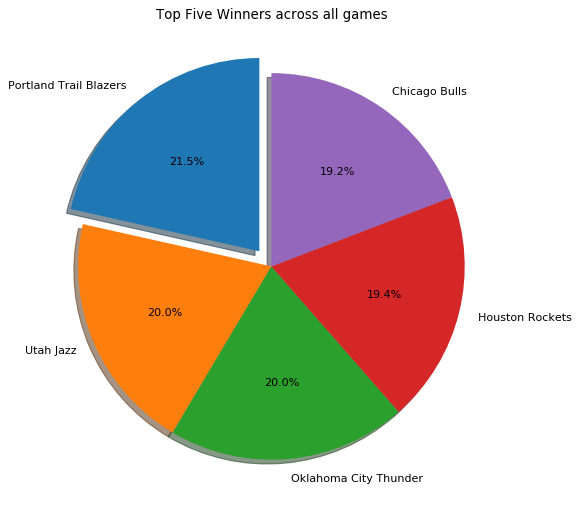

In [25]:
# Visualizing the 5 top winners of all the games.
from matplotlib.pyplot import figure

labels = list(Winners_dframe.index)
wins = list(Winners_dframe['Score'].values)

figure(num=None, figsize=(8, 8), dpi=80,  edgecolor='k')
explode = (0.1,0,0,0,0)
plt.pie(wins, labels=labels,autopct='%1.1f%%',shadow=True,startangle=90,explode=explode)
plt.title('Top Five Winners across all games')
plt.show()

### 3C 4. Analyse the Average Wins for every Home Team

In [26]:
# All the Games are grouped by the Home Team.
HomeTeam_Name = Games_simplified.groupby('HomeTeam_Name')

# Find the unique home teams.
home_teams = Games_simplified['HomeTeam_Name'].unique()

In [27]:
dict_ = {}

# Iterate through all the home teams and calculate the average score for every home team and store them in a dictionary.
for home_team in home_teams:
    
    # Get the scores of every home team in the group and calculate their average.
    team_mean_score = HomeTeam_Name['HomeTeam_Score'].get_group(home_team).mean()
    
    # Storing the Home Team along with their averages.
    dict_[home_team] = team_mean_score  

# Every home team along with their average scores are displayed.
dfObj = pd.DataFrame(list(dict_.items()), columns=['Home Team','Avg Score'])
dfObj

,Home Team,Avg Score
0,Boston Celtics,109.042254
1,Golden State Warriors,112.323077
2,Charlotte Hornets,107.356164
3,Detroit Pistons,101.200000
4,Indiana Pacers,106.216418
5,Orlando Magic,105.700787
6,New York Knicks,100.825000
7,Toronto Raptors,104.909967
8,Houston Rockets,107.456693
9,San Antonio Spurs,107.380597


### 3C 5. Visualizing Home Teams with their average wins.

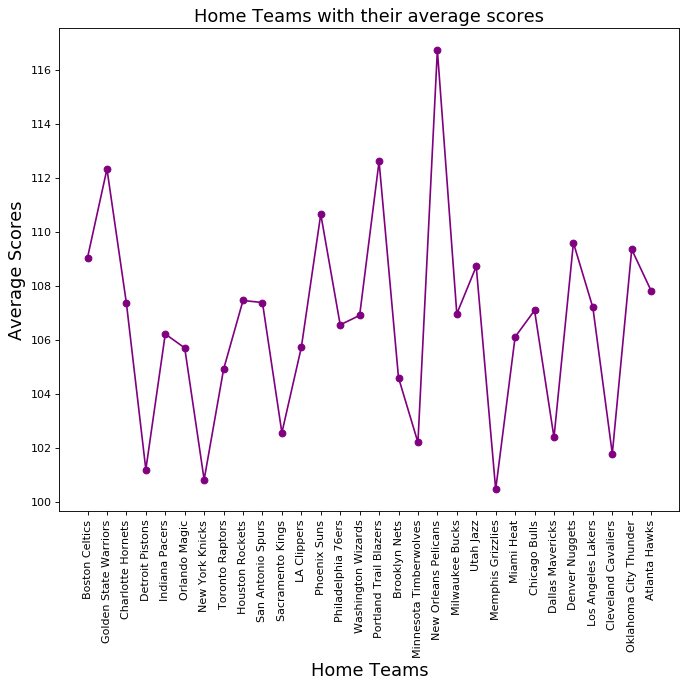

In [28]:
# Visualizing the home teams with their average scores.
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(dfObj['Home Team'],dfObj['Avg Score'], color = 'purple',marker='o')

plt.title('Home Teams with their average scores',fontsize=16)
plt.xlabel('Home Teams',fontsize=16)
plt.ylabel('Average Scores',fontsize=16)
plt.xticks(dfObj['Home Team'],rotation = 90)
plt.show()

### 3D. INSIGHTS FROM NBA GAMES

1. NBA Games Data consists of all the games played between any Home Team Vs. Visitor Team. Every match comprises of Date of the match, both team's score, Both team's ID, the season, duration of the match, home team conference and visitor team's conferecne, and so on.


2. The NBA Games data is not so dirty data, Thus requiring minimum number of Pre-Processing steps.


3. While summarizing, only the time duration of the match was not present in any of the match. Hence dropped. Also the match date is transformed in a suitable format. Additionally there was only 1 record that has missed the Home Team Score. So imputing the missing values by the mean of all the Home Team Scores of all the matches.


4. Using the scores of both the teams, Winners of every match is derived and the top 5 winners are announced throughout the games played. 
    * Portland Trail Blazers with a score of 121 wins across the games ranked first among all.


5. All the top five winners across the games have neck to neck winning percentage. There's a slight difference of 1.3 % between the first and fifth winner.


6. Further for every home team, the average home team score was calculated and it shows that:
    * New Orleans Pelicans has the highest average Home Team Scores across all the Home Teams and Memphis Grizzilies with the least score.
    

7. The home team with the maximum average scores is ahead by a factor of 16 when compared to the least scoring home team.

### 3E. Loading and representing the NBA Stats Data in an appropriate data structure.

The statistics of NBA Games players comprising of their IDs, points they made, blocks they did, how many free throw they attempted, number of steals, total duration of their game stored in NBA_stats.csv file, we use a Dataframe storage structure to store the Players statistics.

### Field Info
* Points(include all points with free throw): 'pts'
* Field goal made(include all points excluding free throw): 'fgm'
* Field goal attempt(include all points excluding free throw):'fga'
* Field goal percentage:'fg_pct'
* Assist: 'ast',
* Block:'blk',
* Rebounds: 'reb',
* Three point field goals made: 'fg3m'
* Three point field goals attempted: 'fg3a'
* Three point field percentage:'fg3_pct'
* Free throw made:'ftm'
* Free throw attempt: 'fta'
* Free throw percentage: 'ft_pct'
* Steals: 'stl'
* Personal fouls: 'pf'
* Turnover: 'turnover'
* Total time: 'min' 

In [2]:
# Loading the NBA statistics data and storing in a dataframe.
Stats_all = pd.read_csv(r"D:\GitHub\Projects\EDA_on_NBA_Games\input\NBA_stats.csv")

# Every player has a unique Player ID associated with it. So the index is replaced by the id column.
Stats_all.set_index('id',inplace = True)

Stats_all.tail()

<IPython.core.display.Javascript object>

,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,ft_pct,...,player.position,player.team_id,player.weight_pounds,team.id,team.abbreviation,team.city,team.conference,team.division,team.full_name,team.name
id,,,,,,,,,,,,,,,,,,,,,
433048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,8,DEN,Denver,West,Northwest,Denver Nuggets,Nuggets
433239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3,NaN,12,IND,Indiana,East,Central,Indiana Pacers,Pacers
433629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,8,DEN,Denver,West,Northwest,Denver Nuggets,Nuggets
433704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,F,15,NaN,26,SAC,Sacramento,West,Pacific,Sacramento Kings,Kings
433764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10,NaN,10,GSW,Golden State,West,Pacific,Golden State Warriors,Warriors


In [30]:
Stats_all.shape

(3725, 45)

## 3F. Pre-Processing the Players statistics data so as to clean and filter the data before analysis.

### 3F 1. Renaming the columns for easy understanding.

Out of 45 columns, a small set of 29 columns are considered for further analysis.

The columns considered are: 
1. player.id
2. player.first_name
3. player.last_name
4. ast
5. blk
6. dreb
7. fg3_pct
8. fg3a
9. fg3m
10. fg_pct
11. fga
12. fgm
13. ft_pct
14. fta
15. ftm
16. min
17. oreb
18. pf
19. pts
20. reb
21. stl
22. turnover
23. player.position
24. team.id
25. team.full_name
26. game.home_team_id
27. game.visitor_team_id
28. game.visitor_team_score
29. game.home_team_score

A separate dataframe is used to store all the selected 12 columns.

In [31]:
# 29 features of all the players are extracted from the overall statistics.
players_stat = Stats_all[['player.id','player.first_name','player.last_name','ast','blk', 'dreb','fg3_pct', 'fg3a',
                            'fg3m','fg_pct','fga','fgm','ft_pct','fta','ftm','min','oreb','pf','pts','reb','stl','turnover',
                            'player.position','team.id','team.full_name','game.home_team_id','game.home_team_score',
                            'game.visitor_team_id','game.visitor_team_score']]


In [32]:
# For easy understanding, all the columns are renamed to proper names.
players_stat.rename(columns={
                            'player.id':'Player_ID',
                            'player.first_name':'First_Name',
                            'player.last_name':'Last_Name',
                            'ast':'AST',
                            'blk':'BLK', 
                            'dreb':'DREB',
                            'fg3_pct':'FG3_PCT', 
                            'fg3a':'FG3A',
                            'fg3m':'FG3M',
                            'fg_pct':'FG_PCT',
                            'fga':'FGA',
                            'fgm':'FGM',
                            'ft_pct':'FT_PCT',
                            'fta':'FTA',
                            'ftm':'FTM',
                            'min':'MIN',
                            'oreb':'OREB',
                            'pf':'PF',
                            'pts':'PTS',
                            'reb':'REB',
                            'stl':'STL',
                            'turnover':'Turnover',
                            'player.position':'Player_Position',
                            'team.id':'Players_Team_ID',
                            'team.full_name':'Players_Team_Name',
                            'game.home_team_id':'Home_Team_ID',
                            'game.home_team_score':'Home_Team_Score',
                            'game.visitor_team_id':'Visitor_Team_ID',
                            'game.visitor_team_score':'Visitor_Team_Score'}, inplace=True)

# Players data after renaming columns
players_stat.head()

,Player_ID,First_Name,Last_Name,AST,BLK,DREB,FG3_PCT,FG3A,FG3M,FG_PCT,...,REB,STL,Turnover,Player_Position,Players_Team_ID,Players_Team_Name,Home_Team_ID,Home_Team_Score,Visitor_Team_ID,Visitor_Team_Score
id,,,,,,,,,,,,,,,,,,,,,
1069008,415,Iman,Shumpert,0.0,1.0,2.0,0.200,5.0,1.0,0.333,...,2.0,0.0,2.0,G,26,Sacramento Kings,4,114,26,95
1069009,49,Nemanja,Bjelica,4.0,0.0,5.0,0.000,2.0,0.0,0.200,...,6.0,0.0,0.0,F,26,Sacramento Kings,4,114,26,95
1069010,91,Willie,Cauley-Stein,4.0,1.0,5.0,0.000,0.0,0.0,0.667,...,11.0,3.0,2.0,C,26,Sacramento Kings,4,114,26,95
1069011,210,Buddy,Hield,1.0,0.0,1.0,0.545,11.0,6.0,0.500,...,1.0,2.0,0.0,G,26,Sacramento Kings,4,114,26,95
1069012,161,De'Aaron,Fox,8.0,1.0,5.0,0.000,2.0,0.0,0.400,...,5.0,1.0,4.0,G,26,Sacramento Kings,4,114,26,95


### 3F 2. Check for any NaN values.

In [33]:
# Null count for each column
players_stat.isnull().sum()

Player_ID                0
First_Name               0
Last_Name                4
AST                   3024
BLK                   3024
DREB                  3024
FG3_PCT               3024
FG3A                  3024
FG3M                  2926
FG_PCT                3024
FGA                   3024
FGM                   2926
FT_PCT                2926
FTA                   2926
FTM                   2926
MIN                   2926
OREB                  3024
PF                    3020
PTS                   2926
REB                   3024
STL                   3024
Turnover              3024
Player_Position       2676
Players_Team_ID          0
Players_Team_Name        0
Home_Team_ID             0
Home_Team_Score          0
Visitor_Team_ID          0
Visitor_Team_Score       0
dtype: int64

In [34]:
# Creating a subset having only the players stat values from Assist(AST) till Position(Player_Position)
df_stats = players_stat.loc[:,'AST':'Player_Position']
df_stats

,AST,BLK,DREB,FG3_PCT,FG3A,FG3M,FG_PCT,FGA,FGM,FT_PCT,FTA,FTM,MIN,OREB,PF,PTS,REB,STL,Turnover,Player_Position
id,,,,,,,,,,,,,,,,,,,,
1069008,0.0,1.0,2.0,0.200,5.0,1.0,0.333,9.0,3.0,0.000,0.0,0.0,20:08,0.0,0.0,7.0,2.0,0.0,2.0,G
1069009,4.0,0.0,5.0,0.000,2.0,0.0,0.200,5.0,1.0,0.000,0.0,0.0,19:22,1.0,1.0,2.0,6.0,0.0,0.0,F
1069010,4.0,1.0,5.0,0.000,0.0,0.0,0.667,6.0,4.0,0.000,0.0,0.0,27:24,6.0,2.0,8.0,11.0,3.0,2.0,C
1069011,1.0,0.0,1.0,0.545,11.0,6.0,0.500,18.0,9.0,0.000,0.0,0.0,32:06,0.0,2.0,24.0,1.0,2.0,0.0,G
1069012,8.0,1.0,5.0,0.000,2.0,0.0,0.400,10.0,4.0,0.667,3.0,2.0,30:30,0.0,4.0,10.0,5.0,1.0,4.0,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3F 3. Checking the records with NaN values.

In [35]:
# Null count for each record in the Data
stats_null_counts = df_stats.isnull().sum(axis=1)
print(stats_null_counts)

id
1069008     0
1069009     0
1069010     0
1069011     0
1069012     0
           ..
433048     20
433239     20
433629     20
433704     19
433764     20
Length: 3725, dtype: int64


##### A lot of Players exists whose many of the features are not registered. Hence, removing those players from our analysis whose more than 50% of the data is not being registered.


1. Set threshold to say 50%
2. If a player's NaN data > 50%:

    2a. Store the index of that particular player in a list.
    
    2b. Remove all those players whose index is there in the list from the data set.

In [36]:
# Finding those players that have null count more than predefined threshold.
threshold = 50

stats_null_counts = df_stats.isnull().sum(axis=1)
#print('Stats Null Counts:', stats_null_counts)

# If the NaN count for a player > threshold, 
null_row = stats_null_counts[stats_null_counts>int(len(df_stats.columns)*(threshold/100))]
#print('Null Records',null_row)

# Selected index that have null values more than threshold
null_idx = null_row.index.tolist()
#print('Null indexes:', null_idx)

players_stat = players_stat.drop(null_idx)
players_stat.head()

,Player_ID,First_Name,Last_Name,AST,BLK,DREB,FG3_PCT,FG3A,FG3M,FG_PCT,...,REB,STL,Turnover,Player_Position,Players_Team_ID,Players_Team_Name,Home_Team_ID,Home_Team_Score,Visitor_Team_ID,Visitor_Team_Score
id,,,,,,,,,,,,,,,,,,,,,
1069008,415,Iman,Shumpert,0.0,1.0,2.0,0.200,5.0,1.0,0.333,...,2.0,0.0,2.0,G,26,Sacramento Kings,4,114,26,95
1069009,49,Nemanja,Bjelica,4.0,0.0,5.0,0.000,2.0,0.0,0.200,...,6.0,0.0,0.0,F,26,Sacramento Kings,4,114,26,95
1069010,91,Willie,Cauley-Stein,4.0,1.0,5.0,0.000,0.0,0.0,0.667,...,11.0,3.0,2.0,C,26,Sacramento Kings,4,114,26,95
1069011,210,Buddy,Hield,1.0,0.0,1.0,0.545,11.0,6.0,0.500,...,1.0,2.0,0.0,G,26,Sacramento Kings,4,114,26,95
1069012,161,De'Aaron,Fox,8.0,1.0,5.0,0.000,2.0,0.0,0.400,...,5.0,1.0,4.0,G,26,Sacramento Kings,4,114,26,95


In [37]:
#Checking null columns counts after removing unwanted rows
players_stat.isnull().sum()

Player_ID              0
First_Name             0
Last_Name              1
AST                    0
BLK                    0
DREB                   0
FG3_PCT                0
FG3A                   0
FG3M                   0
FG_PCT                 0
FGA                    0
FGM                    0
FT_PCT                 0
FTA                    0
FTM                    0
MIN                    0
OREB                   0
PF                     0
PTS                    0
REB                    0
STL                    0
Turnover               0
Player_Position       16
Players_Team_ID        0
Players_Team_Name      0
Home_Team_ID           0
Home_Team_Score        0
Visitor_Team_ID        0
Visitor_Team_Score     0
dtype: int64

### Columns Last_Name, Player_Position are the two columns which still have few NaN values.

### 3F 4. Checking the records with Last Name and Player position with NaN values.

In [38]:
#Handling missing values in individual columns
players_stat[players_stat['Last_Name'].isnull()]

,Player_ID,First_Name,Last_Name,AST,BLK,DREB,FG3_PCT,FG3A,FG3M,FG_PCT,...,REB,STL,Turnover,Player_Position,Players_Team_ID,Players_Team_Name,Home_Team_ID,Home_Team_Score,Visitor_Team_ID,Visitor_Team_Score
id,,,,,,,,,,,,,,,,,,,,,
1069579,342,Nene,NaN,3.0,0.0,4.0,0.0,0.0,0.0,0.5,...,4.0,0.0,0.0,C-F,11,Houston Rockets,11,138,14,134


#### Imputing the record's Last_Name by empty string because no one else's Last_Name can be randomly given to the missing Last_Name record.

In [39]:
# Handling missing last_Name by changing the value with an empty string.
players_stat['Last_Name'] = players_stat['Last_Name'].fillna(value=' ')

#Checking after replacing null value.
players_stat[players_stat['Last_Name'].isnull()]

,Player_ID,First_Name,Last_Name,AST,BLK,DREB,FG3_PCT,FG3A,FG3M,FG_PCT,...,REB,STL,Turnover,Player_Position,Players_Team_ID,Players_Team_Name,Home_Team_ID,Home_Team_Score,Visitor_Team_ID,Visitor_Team_Score
id,,,,,,,,,,,,,,,,,,,,,


In [40]:
# Handling missing Player_Position Value
players_stat[players_stat['Player_Position'].isnull()]

,Player_ID,First_Name,Last_Name,AST,BLK,DREB,FG3_PCT,FG3A,FG3M,FG_PCT,...,REB,STL,Turnover,Player_Position,Players_Team_ID,Players_Team_Name,Home_Team_ID,Home_Team_Score,Visitor_Team_ID,Visitor_Team_Score
id,,,,,,,,,,,,,,,,,,,,,
1069043,2020,Quincy,Acy,0.0,1.0,0.0,0.0,1.0,0.0,0.000,...,0.0,0.0,0.0,NaN,24,Phoenix Suns,28,111,24,109
1069056,2158,Patrick,McCaw,0.0,0.0,1.0,0.0,1.0,0.0,0.000,...,1.0,0.0,1.0,NaN,28,Toronto Raptors,28,111,24,109
1069131,3091,Brandon,Goodwin,1.0,0.0,0.0,0.0,1.0,0.0,0.000,...,0.0,0.0,0.0,NaN,8,Denver Nuggets,8,135,5,105
1069165,3090,Jaron,Blossomgame,0.0,0.0,4.0,0.0,0.0,0.0,1.000,...,5.0,0.0,0.0,NaN,6,Cleveland Cavaliers,29,115,6,99
1069277,3089,Gary,Trent Jr.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,NaN,25,Portland Trail Blazers,25,128,19,112
1069315,1771,Joakim,Noah,2.0,0.0,4.0,0.0,0.0,0.0,0.000,...,5.0,3.0,1.0,NaN,15,Memphis Grizzlies,2,122,15,116
1069360,3090,Jaron,Blossomgame,2.0,0.0,1.0,0.0,1.0,0.0,0.333,...,1.0,1.0,1.0,NaN,6,Cleveland Cavaliers,8,124,6,102
1069365,3450,Deng,Adel,0.0,0.0,1.0,1.0,1.0,1.0,1.000,...,2.0,0.0,0.0,NaN,6,Cleveland Cavaliers,8,124,6,102
1069377,3091,Brandon,Goodwin,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,NaN,8,Denver Nuggets,8,124,6,102


#### Although it is difficult to predict someone position in the game and imputing it with other might affect the game result. But for the current scenario, we are imputing the Player's position by another player's position using a Forward Fill method which implies that the next player's position will be assumed to be the position of current player having NaN as position.

In [41]:
# Handling missing Player_Position by forward padding.
players_stat['Player_Position'] = players_stat['Player_Position'].fillna(method='ffill')

#Checking after replacing null value.
players_stat[players_stat['Player_Position'].isnull()]

,Player_ID,First_Name,Last_Name,AST,BLK,DREB,FG3_PCT,FG3A,FG3M,FG_PCT,...,REB,STL,Turnover,Player_Position,Players_Team_ID,Players_Team_Name,Home_Team_ID,Home_Team_Score,Visitor_Team_ID,Visitor_Team_Score
id,,,,,,,,,,,,,,,,,,,,,


### After pre-processing, Players data:

In [42]:
players_stat.isnull().sum()

Player_ID             0
First_Name            0
Last_Name             0
AST                   0
BLK                   0
DREB                  0
FG3_PCT               0
FG3A                  0
FG3M                  0
FG_PCT                0
FGA                   0
FGM                   0
FT_PCT                0
FTA                   0
FTM                   0
MIN                   0
OREB                  0
PF                    0
PTS                   0
REB                   0
STL                   0
Turnover              0
Player_Position       0
Players_Team_ID       0
Players_Team_Name     0
Home_Team_ID          0
Home_Team_Score       0
Visitor_Team_ID       0
Visitor_Team_Score    0
dtype: int64

### 3G. Analyse, characterise, and summarise the cleaned dataset, using tables and plots where appropriate. Clearly explain and interpret any analysis results which are produced.

### 3G 1. Summarizing clean dataset.

In [43]:
players_stat.describe()

,Player_ID,AST,BLK,DREB,FG3_PCT,FG3A,FG3M,FG_PCT,FGA,FGM,...,PF,PTS,REB,STL,Turnover,Players_Team_ID,Home_Team_ID,Home_Team_Score,Visitor_Team_ID,Visitor_Team_Score
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.00000,701.000000,701.000000,701.000000,...,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,297.055635,2.273894,0.436519,3.134094,0.258200,2.918688,1.07418,0.429738,8.042796,3.721826,...,1.901569,10.116976,4.049929,0.667618,1.253923,14.980029,14.804565,112.506419,15.031384,108.683310
std,390.704647,2.420570,0.767580,2.714878,0.303653,2.858662,1.44130,0.249306,5.642279,2.981073,...,1.501527,8.093773,3.487376,0.948348,1.366331,8.684281,9.372622,12.667801,7.869408,12.211569
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,88.000000,2.000000,87.000000
25%,128.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.286000,4.000000,1.000000,...,1.000000,4.000000,1.000000,0.000000,0.000000,7.000000,6.000000,101.000000,7.000000,99.000000
50%,243.000000,2.000000,0.000000,3.000000,0.167000,2.000000,1.00000,0.444000,7.000000,3.000000,...,2.000000,8.000000,3.000000,0.000000,1.000000,15.000000,12.000000,113.000000,15.000000,109.000000
75%,363.000000,3.000000,1.000000,5.000000,0.500000,4.000000,2.00000,0.583000,12.000000,6.000000,...,3.000000,15.000000,6.000000,1.000000,2.000000,23.000000,22.000000,122.000000,22.000000,117.000000
max,3450.000000,13.000000,6.000000,14.000000,1.000000,19.000000,8.00000,1.000000,30.000000,16.000000,...,6.000000,48.000000,17.000000,5.000000,7.000000,30.000000,30.000000,138.000000,27.000000,138.000000


#### Saving the cleaned, filtered data in a new Comma sparated file.

In [44]:
players_stat.to_csv('./Cleaned_NBA_stats.csv')

### 3G 2. Analyze the Efficiency Rating, True Shooting Percentage per player.

From the NBA Players Statistics, we can compute the Efficiency Rate for every player as well as the True Shooting Percentage.

**Efficiency Rating:** It is intended to give a “total perspective” on a player’s statistical performance in a basketball game, taking into account every statistic listed on a player’s box score.

**EFF:** (PTS + REB + AST + STL + BLK − ((FGA − FGM) + (FTA − FTM) + TO))

**True Shooting Percentage:** It is defined as a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.

**True Shooting Percentage** = PTS / (2 * TSA) where TSA = (FGA + 0.44 * FTA)

In [45]:
#Creating Calculated columns Efficiency_Rating & True_Shooting_Percentage for every player.
# Looping through all the players.
for idx in players_stat.index:
    
    # Calculating efficieny rating and true shooting percentage.
    eff_rat = players_stat.loc[idx,'PTS'] + players_stat.loc[idx,'REB'] + players_stat.loc[idx,'AST'] + players_stat.loc[idx,'STL'] + players_stat.loc[idx,'BLK'] -((players_stat.loc[idx,'FGA'] - players_stat.loc[idx,'FGM'])+(players_stat.loc[idx,'FTA'] - players_stat.loc[idx,'FTM']) +players_stat.loc[idx,'Turnover'])
    
    # True Shooting Percentage.
    fga_fta = ((2 * players_stat.loc[idx,'FGA']) + (0.88 * players_stat.loc[idx,'FTA']))
    
    # Avoiding divide by zero.
    true_shooting_perc = players_stat.loc[idx,'PTS'] / fga_fta if fga_fta != 0 else 0
    
    players_stat.loc[idx,'Efficiency_Rating'] = eff_rat
    players_stat.loc[idx,'True_Shooting_Percentage'] = true_shooting_perc

In [46]:
# Checking NaN values in the new calculated columns.
players_stat.isnull().sum()

Player_ID                   0
First_Name                  0
Last_Name                   0
AST                         0
BLK                         0
DREB                        0
FG3_PCT                     0
FG3A                        0
FG3M                        0
FG_PCT                      0
FGA                         0
FGM                         0
FT_PCT                      0
FTA                         0
FTM                         0
MIN                         0
OREB                        0
PF                          0
PTS                         0
REB                         0
STL                         0
Turnover                    0
Player_Position             0
Players_Team_ID             0
Players_Team_Name           0
Home_Team_ID                0
Home_Team_Score             0
Visitor_Team_ID             0
Visitor_Team_Score          0
Efficiency_Rating           0
True_Shooting_Percentage    0
dtype: int64

### 3G 3. Visualize the Efficiency Rating of the top 10 players.

In [47]:
# Considering only the players and their efficiency ratings along with their team names.
df_eff_rat = players_stat[['First_Name','Efficiency_Rating','Players_Team_Name']]

# Sorting the players according to the efficiency ratings.
df_eff_rat.sort_values(by = 'Efficiency_Rating',ascending=False, inplace=True)

# Since every player is unique, so Index is setted to the player's name.
df_eff_rat = df_eff_rat.set_index('First_Name')
df_eff_rat

,Efficiency_Rating,Players_Team_Name
First_Name,,
Kyrie,44.0,Boston Celtics
James,42.0,Houston Rockets
D'Angelo,40.0,Brooklyn Nets
Tobias,39.0,LA Clippers
Rudy,38.0,Utah Jazz
...,...,...
Brandon,-3.0,Denver Nuggets
Harrison,-3.0,Dallas Mavericks
Iman,-3.0,Sacramento Kings


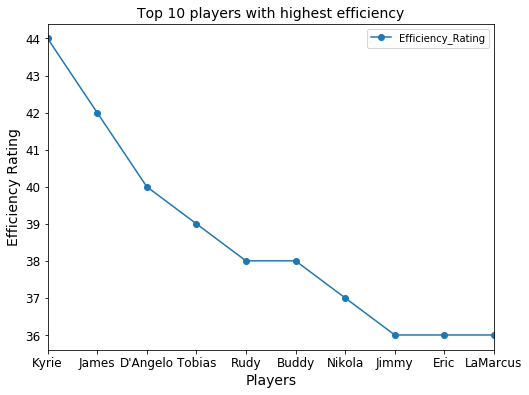

In [48]:
# Extracting the top 10 players from the data set .
df_eff_rat.iloc[0:10,:].plot(figsize=(8, 6), marker = 'o')

# Title of the graph
plt.title('Top 10 players with highest efficiency',fontsize=14)

# Labels on both X and Y axis.
plt.xlabel('Players',fontsize=14)
plt.ylabel('Efficiency Rating',fontsize=14)
plt.tick_params(labelsize = 12)
plt.show()

### 3G 4. Visualize the Efficiency ratings per Team

1. Group all the players according to the team they belong to.
2. Iterate through each team:
    2.1. Average the efficiency rating for that particular team.
    2.2. Store that average efficiency rating for the corressponding team in a dictionary.
    2.3. Converting the dictionary to a dataframe.

In [49]:
#Average Efficiency Rating Team-wise
groupby_Team_df = df_eff_rat.groupby('Players_Team_Name')
teams = groupby_Team_df.groups.keys()

team_avg_efficiency = {}
for team in teams:
    # Averaging the efficiency rating for every team.
    mean_ = groupby_Team_df.get_group(team)['Efficiency_Rating'].mean()
    # Storing the average with corressponding team.
    team_avg_efficiency[team] = mean_
    
#Converting a list of tuples for easy processing
team_avg_efficiency =  team_avg_efficiency.items()

#Creating Dataframe for easy visualization
team_avg_efficiency = pd.DataFrame({'Team_Name': [i[0] for i in team_avg_efficiency],'Average_Efficiency':[i[1] for i in team_avg_efficiency]})

# Every team is unique, so index is replaced by the team name.
team_avg_efficiency = team_avg_efficiency.set_index('Team_Name')
team_avg_efficiency

,Average_Efficiency
Team_Name,
Atlanta Hawks,11.142857
Boston Celtics,12.727273
Brooklyn Nets,13.750000
Charlotte Hornets,11.111111
Chicago Bulls,10.176471
Cleveland Cavaliers,8.468750
Dallas Mavericks,10.227273
Denver Nuggets,13.375000
Detroit Pistons,9.147059


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

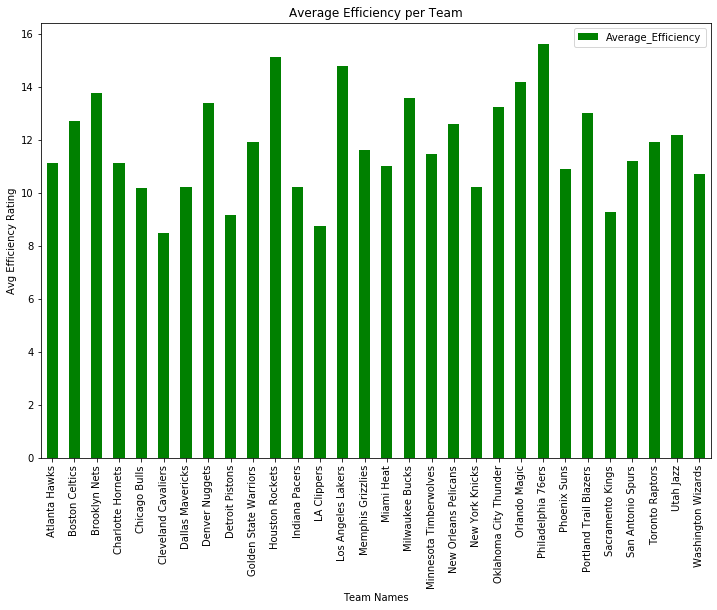

In [50]:
#Visualising average efficiency.

team_avg_efficiency.plot(kind='bar',figsize=(12, 8), color='green')

# Title of the graph
plt.title('Average Efficiency per Team')

# Labels for both X and Y axis.
plt.xlabel('Team Names')
plt.ylabel('Avg Efficiency Rating')
plt.xticks(rotation=90)

### 3G 5. Visualize theTrue Shooting Percentage per Team

1. Group all the players according to the team they belong to.
2. Iterate through each team:
    
    2.1. Average the True Shooting Percentage for that particular team.
    
    2.2. Store that average True Shooting Percentage for the corressponding team in a dictionary.
    
    2.3. Converting the dictionary to a dataframe.

In [51]:
# True Shooting Percentage Team-wise
df_shoot_perc = players_stat[['First_Name', 'AST', 'BLK', 'DREB', 'PF', 'PTS', 'REB', 'STL', 'Players_Team_Name','Efficiency_Rating', 'True_Shooting_Percentage']]

groupby_Shooting_df = df_shoot_perc.groupby('Players_Team_Name')

# Unique Teams
teams = groupby_Shooting_df.groups.keys()

team_true_perc = {}

# Iterating through all the teams
for team in teams:
    # Averaging the True Shooting Percentage for every team.
    max_ = groupby_Shooting_df.get_group(team)['True_Shooting_Percentage'].max()

    # Storing the average with corressponding team.
    team_true_perc[team] = max_

#Converting a list of tuples for easy processing
team_true_perc =  team_true_perc.items()

#Creating Dataframe for easy visualization
team_true_perc = pd.DataFrame({'Team_Name': [i[0] for i in team_true_perc],'Max Shooting':[i[1] for i in team_true_perc]})

# Every team is unique, so index is replaced by the team name.
team_true_perc = team_true_perc.set_index('Team_Name')
team_true_perc

,Max Shooting
Team_Name,
Atlanta Hawks,1.000000
Boston Celtics,1.250000
Brooklyn Nets,1.041667
Charlotte Hornets,1.500000
Chicago Bulls,1.030928
Cleveland Cavaliers,1.500000
Dallas Mavericks,1.136364
Denver Nuggets,1.071429
Detroit Pistons,1.215278


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

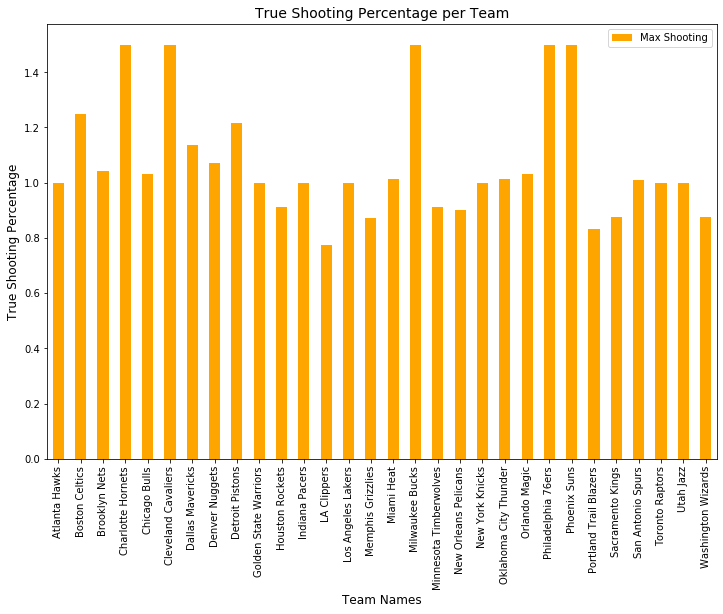

In [52]:
# Visualising True Shooting Percentage Per Team.

team_true_perc.plot(kind='bar',figsize=(12, 8), color='orange')

# Title of the graph
plt.title('True Shooting Percentage per Team',fontsize = 14)

# Labels for both X and Y axis.
plt.xlabel('Team Names',fontsize = 12)
plt.ylabel('True Shooting Percentage',fontsize = 12)
plt.xticks(rotation=90)

### 3G 6.  Correlation among Players Statistics

In [53]:
# Considering only few features of the players.
true_shoot = players_stat[['AST', 'BLK', 'Turnover', 'Home_Team_Score', 'Visitor_Team_Score', 'Efficiency_Rating', 
                           'True_Shooting_Percentage']]

# Correlating between the Players' features.
true_shoot.corr().style.background_gradient(cmap='Blues')

,AST,BLK,Turnover,Home_Team_Score,Visitor_Team_Score,Efficiency_Rating,True_Shooting_Percentage
AST,1,-0.00139299,0.426436,0.06144,0.0777045,0.516657,0.0752026
BLK,-0.00139299,1,0.0222023,0.0179293,0.0370209,0.25168,0.0795425
Turnover,0.426436,0.0222023,1,-0.0438385,0.033766,0.318045,0.128259
Home_Team_Score,0.06144,0.0179293,-0.0438385,1,0.216219,0.0970415,0.126649
Visitor_Team_Score,0.0777045,0.0370209,0.033766,0.216219,1,0.130875,0.117267
Efficiency_Rating,0.516657,0.25168,0.318045,0.0970415,0.130875,1,0.532568
True_Shooting_Percentage,0.0752026,0.0795425,0.128259,0.126649,0.117267,0.532568,1


### 3G 7. Analysing the Efficiency Rating of players based on their number of assists.

Text(0, 0.5, 'Efficiency Rate')

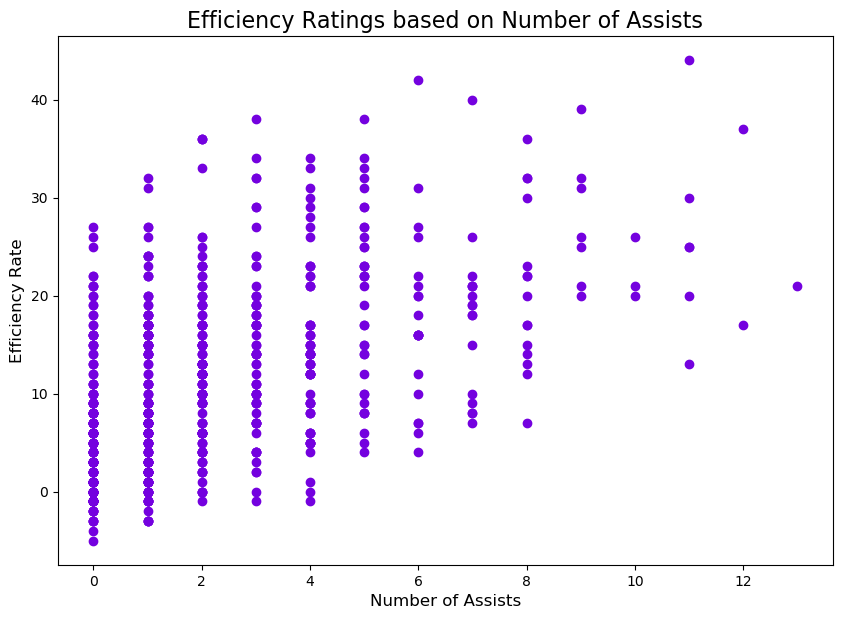

In [54]:
# Comparing the efficiency ratings with the number of assists by the players.
plt.figure(figsize=(10,7),dpi=100)
plt.scatter(players_stat['AST'], players_stat['Efficiency_Rating'],c = '#7401DF', marker='o')
plt.title('Efficiency Ratings based on Number of Assists',size = 16)
plt.xlabel('Number of Assists',size = 12)
plt.ylabel('Efficiency Rate',size = 12)

### CONCLUSION

1. The Players statistics data was too noisy and large number of players features were initially not registered which ultimately hampers the analysis.


2. A lot of Pre-processing steps were required to clean, filter the Players data.
    2.1 All the players whose more than half of the data was not present, those Players were removed.
    2.2 All the null values in the Last_Name column were replaced with empty strings.
    2.3 All the null values in Players position were filled by the forward fill method.


3. Various new parameters such as the Efficiency Rating of the player EFF: (PTS + REB + AST + STL + BLK − ((FGA − FGM) + (FTA − FTM) + TO)), True Shooting Percentage: TSP = PTS / (2 * TSA) where TSA = (FGA + 0.44 * FTA) are derived using the rest of the features of Players.


4. The Efficiency of Top 10 Players depicts that the Player Kyrie has the maximum efficiency of 44.0.


5. The team that plays really very well comes out to be Philadelphia 76ers.


6. Five teams named 'Charlotte Hornets', 'Cleveland Cavaliers' ,'Philadelphia 76ers' ,'Phoenix Suns' ,'Milwaukee Bucks' proves to be the best teams in Shooting giving each other a tough competition and 'LA Clippers' is at the last in Shooting.


7. The correlation between the fields like Efficiency Rating and True Shooting Percentage gives the insight of high co-relation. Also there is positive co relation between the number of assists a player does and it's efficiency rating.


8. Also the players who assists(AST) the best doesn't perform well while Blocking (BLK). AST and BLK are highly non co-related.

9. It is clearly evident from the last graph between the Efficiency Rating and number of Assists made by players, more the number of assists, higher the value of the Efficiency ratings. Lower the number of assists, efficiency varies in between 0 and 20.

10. For the further analysis, the distance and the shooting efficiency can be visualised.